In [86]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from pylab import plot, show
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors

In [131]:
data = pd.read_csv("CO2_total.csv")
data.columns=[(i.split())[0] for i in data.columns]

In [132]:
df=data[~data.isin(['..']).any(axis=1)]
df=df.set_index('Country')
df[df.columns]=df[df.columns].astype(float)

In [199]:
df=df.sort_values(by=['2019'], ascending=False)

In [233]:
total_co2=sum(df['2019'])
countries=[]
#top_data=[]
ratio=0
co2_emis=0
i=0
while ratio<0.7:
    countries.append(df.index[i])
    #top_data.append(df['2019'][i])
    co2_emis+=df['2019'][i]
    i+=1
    ratio=co2_emis/total_co2

In [234]:
#adjust order
temp=countries[0]
countries[0]=countries[1]
countries[1]=countries[3]
countries[3]=temp

These countries emit 70% of total CO2 ['United States', 'Russian Federation', 'India', 'China', 'Japan', 'Germany', 'Iran, Islamic Rep.', 'Indonesia', 'Korea, Rep.', 'Canada']

In [235]:
top_data=df['2019'][countries].to_numpy()

In [236]:
top_df=df[df.index.isin(countries)].transpose()

In [237]:
top_df.index=top_df.index.astype(int)

In [238]:
import seaborn as sns
sns.set_style(style='white')

In [239]:
piedata=top_data
pielabel=countries
piedata=np.append(top_data,(total_co2-sum(top_data)))
pielabel.append("Rest")

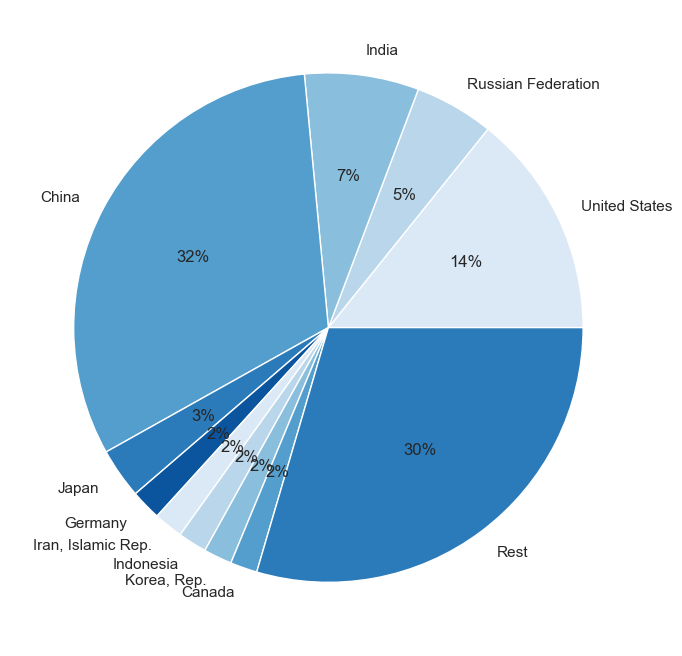

<Figure size 1570x827 with 0 Axes>

In [249]:
palette_color = sns.color_palette("Blues")#sns.color_palette("mako", as_cmap=True)
plt.pie(piedata, labels=countries, colors=palette_color, autopct='%.0f%%')
# displaying chart
plt.show()
plt.savefig("fig1_pie.png") 

From the above pie figure, we can observe that top 10 countries accounts for more than 70% of total CO2 emission. In the following part we will mainly analyze the relaship between CO2 emission and government spending of these countries. 

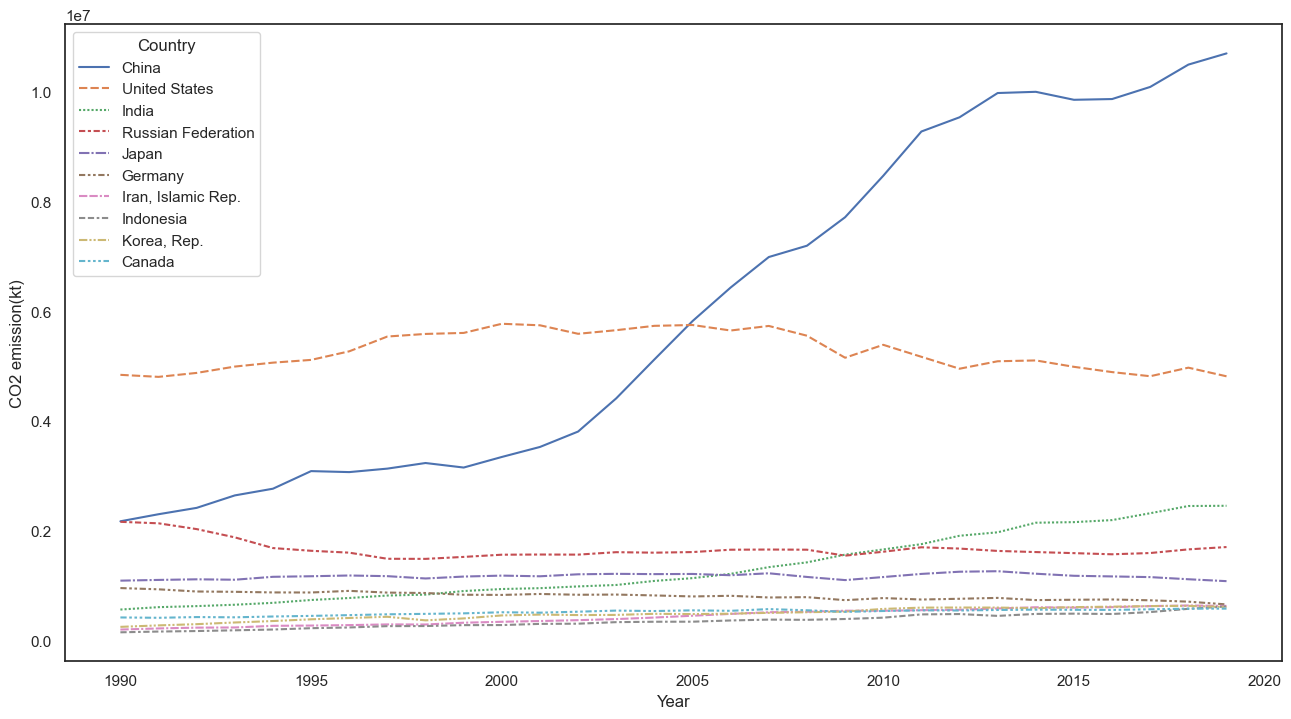

In [250]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.set_style(style='white')
ax = sns.lineplot(data=top_df)
ax.set(ylabel='CO2 emission(kt)', xlabel='Year')
plt.savefig("fig2_total.png") 

Among these countries, developed countries are emitting equal or less CO2 than previous, while developing countries are emiting more.

In [244]:
co2perdata = pd.read_csv("CO2_perGDP.csv")
co2perdata.columns=[(i.split())[0] for i in co2perdata.columns]
df2=co2perdata[~co2perdata.isin(['..']).any(axis=1)]
df2=df2.set_index('Country')
df2[df2.columns]=df2[df2.columns].astype(float)

In [245]:
top_df2=df2[df2.index.isin(countries)].transpose()

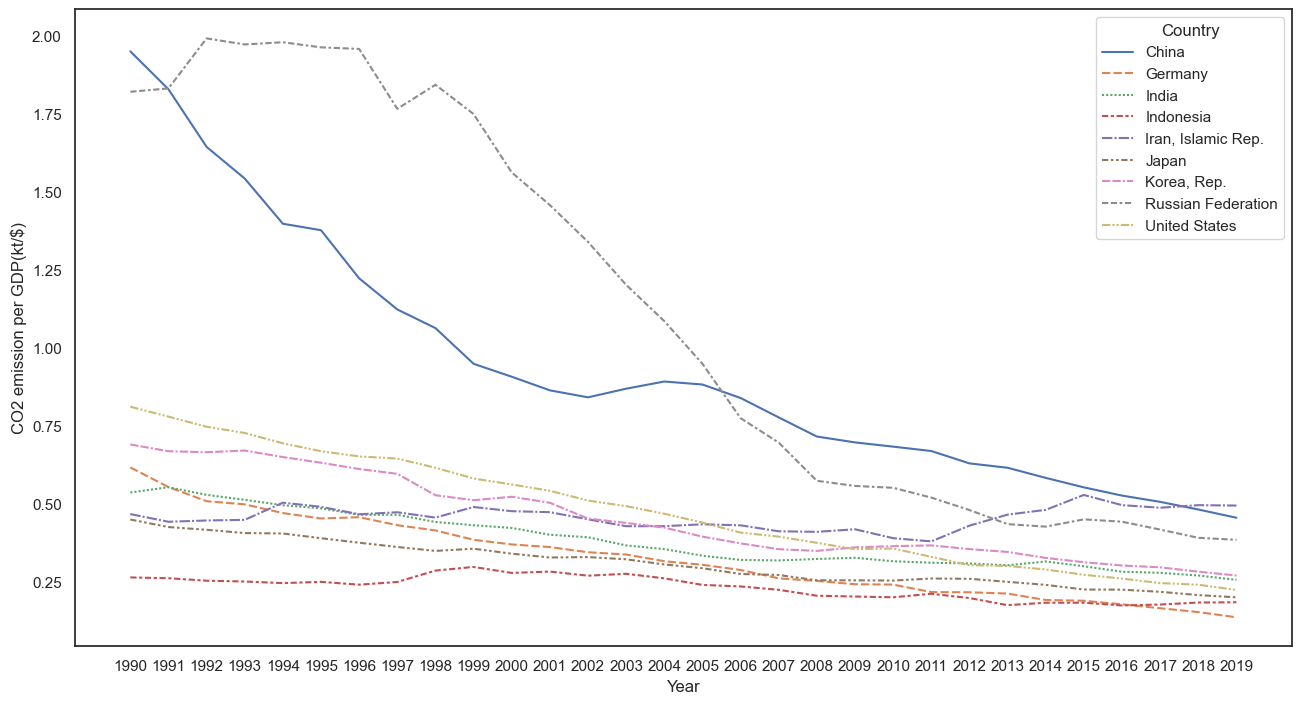

In [251]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.set_style(style='white')
ax = sns.lineplot(data=top_df2)
ax.set(ylabel='CO2 emission per GDP(kt/$)', xlabel='Year')
plt.savefig("fig3_perGDP.png") 

Though developing countries are emiting more CO2 in amount, CO2 per GDP is decreasing for most of countries, which shows a growing awerness of enviromental protection.

In [254]:
from sklearn.linear_model import LinearRegression
#process spending data
data = pd.read_csv("spending.csv")
data.columns=[(i.split())[0] for i in data.columns]
df_spending=data[~data.isin(['..']).any(axis=1)]
df_spending=df_spending.set_index('Country')
df_spending[df_spending.columns]=df_spending[df_spending.columns].astype(float)

In [257]:
df_topspending=df_spending[df_spending.index.isin(countries)].transpose()

In [309]:
coef_list=np.zeros(9)
for i in range(9):
    y=df_topspending[countries[i]].to_numpy()
    X=top_df2[countries[i]].to_numpy() 
    X=X.reshape(-1, 1) 
    reg = LinearRegression().fit(X, y)
    coef_list[i]=reg.coef_[0]

In [338]:
spending_list=(df_topspending.loc[:,(df_topspending.columns).isin(countries[:9])].tail(1).to_numpy())[0]

In [340]:
emission_list=(top_df2.loc[:,(top_df2.columns).isin(countries[:9])].tail(1).to_numpy())[0]

In [346]:
point_df=(pd.DataFrame([emission_list,coef_list,spending_list,countries[:9]])).transpose()

In [359]:
point_df.columns = ["CO2 emission per GDP","Coefficient","Government spending percent","Countries"]

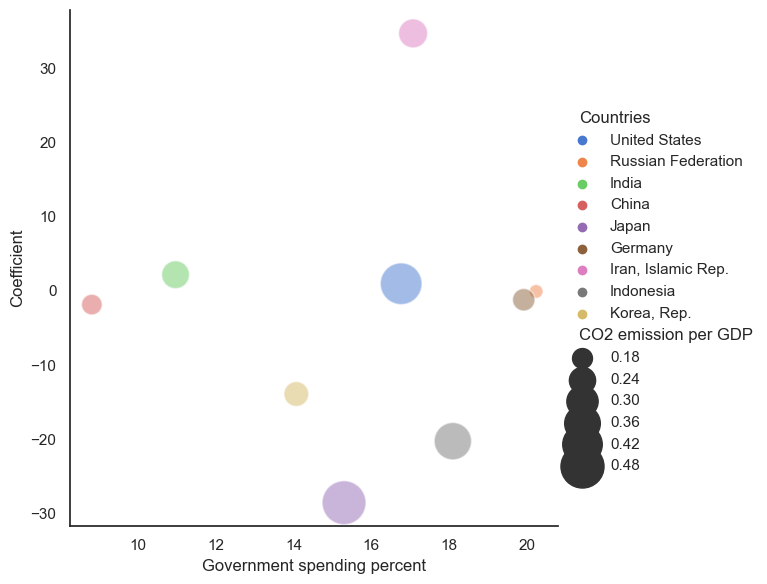

In [364]:
sns.set_style(style='white')
sns.relplot(x="Government spending percent", y="Coefficient", hue="Countries", size="CO2 emission per GDP",
            sizes=(100, 1000), alpha=.5, palette="muted",
            height=6, data=point_df)

We perform linear regression between CO2 emission per GDP and Government spending percent, and shows the figure above. The y-axis shows the coefficient in linear regression. The higher it is, the more CO2 emission will be when Government spending percent increase. The size of points represent the CO2 emission per GDP, the bigger the size is, the larger emission will be.
From this graph, we can observe that for devoloped countries like Japan and Korea, their CO2 emission per GDP decrease when Government spending increase. While, for developing countries like Iran,their CO2 emission per GDP increases when Government spending increase. For other countries, CO2 emission per GDP almost remain unchanged when Government spending increase.